# 数据挖掘 - 机器学习
- 数据集：训练集（train set）、验证集（validation set）、测试集（test set）
    - 训练集（**建模**）：用来训练和拟合数据
        - tips：训练集数据量越大，训练结果越准确，训练集的增多应该以整个数据集的增多为前提，而不是增大训练集在整个数据集中的占比
    - 验证集（**调参**）：经过训练集训练出多个模型后，使用验证集进行数据纠偏或比较预测
    - 测试集（**评价**）：考察模型的泛化能力
        - 泛化：对未知数据的预测
        - 过拟合：训练集、验证集表现良好，但是测试集表现较差
        - 交叉验证：测试集、训练集二八分（二八定律），丢弃了测试集
        - K-fold 交叉验证：将数据分为 K 份，每份轮流作一遍测试集，其他作训练集


In [47]:
## 导包
import numpy as np # 数值计算
import pandas as pd # 数据分析

In [48]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler # 归一化、标准化
from sklearn.preprocessing import LabelEncoder,OneHotEncoder # 标签化、独热编码
from sklearn.preprocessing import Normalizer # 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA 降维
from sklearn.decomposition import PCA # PCA 降维

In [49]:
## 查看数据集
df = pd.read_csv(".//datasets//HR_comma_sep.csv")
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [50]:
## 
# @arg
# sl: statisfaction_level --- Flase: MinMaxScaler; True: StandardScaler
# le: last_evaluation --- Flase: MinMaxScaler; True: StandardScaler
# npr: number_project --- Flase: MinMaxScaler; True: StandardScaler
# amh: average_monthly_hours --- Flase: MinMaxScaler; True: StandardScaler
# tsc: time_spend_company --- Flase: MinMaxScaler; True: StandardScaler
# wa: Work_accident --- Flase: MinMaxScaler; True: StandardScaler
# pl5: promotion_last_5years --- Flase: MinMaxScaler; True: StandardScaler
# dp: Department --- False: LabelEncoding; True: OneHotEncoding
# slr: salary --- False: LabelEncoding; True: OneHotEncoding
# lower_d: 是否降维 --- Default: False
# ld_n: 保留的维数 --- Default: 1
def hr_preprocessing(sl=False, le=False, npr=False, amh=False, tsc=False, wa=False, pl5=False, dp=False, slr=False, lower_d=False, ld_n=1):
    ## 0. 加载数据
    df = pd.read_csv(".//datasets//HR_comma_sep.csv")
    
    ## 1. 清洗数据（去除异常值、抽样，这里数据量较小不进行抽样了）
    df = df.dropna(subset=["satisfaction_level","last_evaluation"])
    df = df[df["satisfaction_level"]<=1][df["salary"]!="nme"]
    
    ## 2. 得到标注
    label = df["left"]
    df = df.drop("left", axis=1)
    
    ## 3. 特征选择
    
    
    ## 4. 特征处理
    # 对 "satisfaction_level", "last_evaluation", "number_project",
    # "average_monthly_hours", "time_spend_company", "Work_accident",
    # "promotion_last_5years" 进行归一化和标准化
    scaler_lst = [sl, le, npr, amh, tsc, wa, pl5]
    column_lst = ["satisfaction_level", "last_evaluation", "number_project", 
                  "average_monthly_hours", "time_spend_company", "Work_accident", 
                  "promotion_last_5years"]
    for i in range(len(scaler_lst)):
        if not scaler_lst[i]:
            df[column_lst[i]] =\
            MinMaxScaler().fit_transform(df[column_lst[i]].values.reshape(-1,1)).reshape(1,-1)[0]
        else:
            df[column_lst[i]] =\
            StandardScaler().fit_transform(df[column_lst[i]].values.reshape(-1,1)).reshape(1,-1)[0]
    # 对 "Department", "salary" 进行标签化和归一化
    scaler_lst = [dp, slr]
    column_lst = ["Department", "salary"]
    for i in range(len(scaler_lst)):
        if not scaler_lst[i]:
            if column_lst[i] == "salary":
                df[column_lst[i]] = [map_salary(s) for s in df["salary"].values]
            else:
                df[column_lst[i]] = LabelEncoder().fit_transform(df[column_lst[i]])
            df[column_lst[i]] = MinMaxScaler().fit_transform(df[column_lst[i]].values.reshape(-1,1)).reshape(1,-1)[0]
        else:
            df = pd.get_dummies(df, columns=[column_lst[i]])
    # 降维
    if lower_d:
        return PCA(n_components=ld_n).fit_transform(df.values),label
#         return LinearDiscriminantAnalysis(n_components=ld_n)
    
    return df,label



In [51]:
##
d = dict([("low",0), ("medium",1), ("high",2)])
def map_salary(s):
    return d.get(s,0)


In [8]:
## 建模分析
def hr_modeling(features, label):
    from sklearn.model_selection import train_test_split
    f_v = features.values # 特征
    l_v = label.values # 标注
    X_tt,X_validation,Y_tt,Y_validation = train_test_split(f_v, l_v, test_size=0.2)
    X_train,X_test,Y_train,Y_test = train_test_split(X_tt, Y_tt, test_size=0.25)
    print(len(X_train), len(X_validation), len(X_test))


In [9]:
## 
def main():
#     print(hr_preprocessing(sl=True, le=True, lower_d=False, ld_n=3))
    features,label = hr_preprocessing()
    hr_modeling(features, label)
    
if __name__ == "__main__":
    main()
    
    

8999 3000 3000


## 分类模型
> KNN、朴素贝叶斯、决策树、支持向量机、集成方法、Logistic 映射、人工神经网络

### KNN（K-Nearest Neighbors）
- 距离：
    - 欧氏距离：$$d_{12} = \sqrt{\sum^{n}_{k=1}(x_{1k}-x_{2k})^2}$$
    - 曼哈顿距离：$$d_{12} = \sum^{n}_{k=1}|x_{1k}-x_{2k}|$$
    - 闵可夫斯基距离：$$d_{12} = ^p\sqrt{\sum^{n}_{k=1}|x_{1k}-x_{2k}|}$$

<img style="float: center;" src="./figures/距离.png" width="35%">
<center>Fig. 距离</center>



- KD-Tree：

<img style="float: left;" src="./figures/KD-Tree1.png" width="35%">
<img style="float: right;" src="./figures/KD-Tree2.png" width="50%">


<center>Fig. KD-Tree</center>

 - KNN算法思想：
 
<img style="float: center;" src="./figures/KNN算法思想.png" width="35%">
<center>Fig. KNN算法思想</center>
    

In [10]:
## 建模分析
def hr_modeling(features, label):
    from sklearn.model_selection import train_test_split
    f_v = features.values # 特征
    l_v = label.values # 标注
    # 测试集：X_tt, Y_tt
    # 验证集：X_validation, Y_validation
    X_tt,X_validation,Y_tt,Y_validation = train_test_split(f_v, l_v, test_size=0.2)
    X_train,X_test,Y_train,Y_test = train_test_split(X_tt, Y_tt, test_size=0.25)
    print(len(X_train), len(X_validation), len(X_test))
    
    ## KNN
    from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier # 
    knn_clf = KNeighborsClassifier(n_neighbors=3) # 调参
    knn_clf_n5 = KNeighborsClassifier(n_neighbors=5)
    knn_clf.fit(X_train, Y_train) # 拟合
    knn_clf_n5.fit(X_train, Y_train) # 拟合
    Y_pred = knn_clf.predict(X_validation) # 模型验证
    Y_pred_n5 = knn_clf_n5.predict(X_validation) # 模型验证
    from sklearn.metrics import accuracy_score,recall_score,f1_score # 模型评价
    print("训练集（Train Set）：")
    Y_pred = knn_clf.predict(X_train)
    print("ACC:", accuracy_score(Y_train, Y_pred)) # 准确率
    print("REC:", recall_score(Y_train, Y_pred)) # 召回率
    print("F-Score:", f1_score(Y_train, Y_pred)) # 综合反应

    print("验证集(Validation Set)：")
    Y_pred = knn_clf.predict(X_validation)
    print(" ++++ n = 3 ++++ ")
    print("ACC:", accuracy_score(Y_validation, Y_pred)) # 准确率
    print("REC:", recall_score(Y_validation, Y_pred)) # 召回率
    print("F-Score:", f1_score(Y_validation, Y_pred)) # 综合反应
    print(" ++++ n = 5 ++++ ")
    print("ACC:", accuracy_score(Y_validation, Y_pred_n5)) # 准确率
    print("REC:", recall_score(Y_validation, Y_pred_n5)) # 召回率
    print("F-Score:", f1_score(Y_validation, Y_pred_n5)) # 综合反应
    
    print("测试集（Test Set）：")
    Y_pred = knn_clf.predict(X_test)
    print("ACC:", accuracy_score(Y_test, Y_pred)) # 准确率
    print("REC:", recall_score(Y_test, Y_pred)) # 召回率
    print("F-Score:", f1_score(Y_test, Y_pred)) # 综合反应
    
    # 模型存取
#     from sklearn.externals import joblib # 旧版本 joblib 包引用方法（0.20.3）
    import joblib # 0.20.3 之后版本的 joblib 引用方法
    joblib.dump(knn_clf, "knn_clf") # 保存模型
    knn_clf = joblib.load("knn_clf") # 使用模型
    print("Test2:")
    Y_pred = knn_clf.predict(X_test)
    print("ACC:", accuracy_score(Y_test, Y_pred)) # 准确率
    print("REC:", recall_score(Y_test, Y_pred)) # 召回率
    print("F-Score:", f1_score(Y_test, Y_pred)) # 综合反应
    


In [11]:
## 
def main():
#     print(hr_preprocessing(sl=True, le=True, lower_d=False, ld_n=3))
    features,label = hr_preprocessing()
    hr_modeling(features, label)
    
if __name__ == "__main__":
    main()
    


8999 3000 3000
训练集（Train Set）：
ACC: 0.9757750861206801
REC: 0.9554937413073713
F-Score: 0.9497695852534563
验证集(Validation Set)：
 ++++ n = 3 ++++ 
ACC: 0.9593333333333334
REC: 0.9271255060728745
F-Score: 0.9184491978609625
 ++++ n = 5 ++++ 
ACC: 0.9496666666666667
REC: 0.9095816464237517
F-Score: 0.8992661774516345
测试集（Test Set）：
ACC: 0.951
REC: 0.9034175334323923
F-Score: 0.8921496698459281
Test2:
ACC: 0.951
REC: 0.9034175334323923
F-Score: 0.8921496698459281


> n = 3 时模型要优于 n = 5 时

In [66]:
## 
def main():
#     print(hr_preprocessing(sl=True, le=True, lower_d=False, ld_n=3))
    features,label = hr_preprocessing(sl=True, le=True, npr=True, amh=True, tsc=True, wa=True, pl5=True, dp=False, slr=False)
    hr_modeling(features, label)
    
if __name__ == "__main__":
    main()
    


8999 3000 3000
训练集（Train Set）：
ACC: 0.9781086787420824
REC: 0.9652711703139867
F-Score: 0.953701527614571
验证集(Validation Set)：
 ++++ n = 3 ++++ 
ACC: 0.969
REC: 0.9481792717086834
F-Score: 0.9357290946786454
 ++++ n = 5 ++++ 
ACC: 0.9696666666666667
REC: 0.9285714285714286
F-Score: 0.9357798165137615
测试集（Test Set）：
ACC: 0.9623333333333334
REC: 0.9139072847682119
F-Score: 0.9243134628265238
Test2:
ACC: 0.9623333333333334
REC: 0.9139072847682119
F-Score: 0.9243134628265238


In [69]:
## 
def main():
#     print(hr_preprocessing(sl=True, le=True, lower_d=False, ld_n=3))
    features,label = hr_preprocessing(sl=True, le=True, npr=True, amh=True, tsc=True, wa=True, pl5=True, dp=True, slr=False)
    hr_modeling(features, label)
    
if __name__ == "__main__":
    main()
    


8999 3000 3000
训练集（Train Set）：
ACC: 0.974997221913546
REC: 0.9650613786591123
F-Score: 0.9478321354045909
验证集(Validation Set)：
 ++++ n = 3 ++++ 
ACC: 0.951
REC: 0.9239280774550485
F-Score: 0.9008766014834794
 ++++ n = 5 ++++ 
ACC: 0.951
REC: 0.9156293222683264
F-Score: 0.9000679809653296
测试集（Test Set）：
ACC: 0.951
REC: 0.9356164383561644
F-Score: 0.9028420356906808
Test2:
ACC: 0.951
REC: 0.9356164383561644
F-Score: 0.9028420356906808


### 朴素贝叶斯（Naive Bayes ）
- 概率：$P(A)$
- 条件概率：$P(A|B)$
- 联合概率：$P(A,B)$
- 三种概率之间的关系：$$P(A,B) = P(A|B)P(B) = P(B|A)P(A)$$
- 全概率公式：$$P(B) = \sum P(A_i)P(B|A_i)$$
- 贝叶斯公式：
$$P(B_i|A) = \frac{P(B_i)P(A|B_i)}{\sum P(B_j)P(A|B_j)}$$
$$\Rightarrow P(B|A) = \frac{P(A|B)P(B)}{P(A)}$$

- 拉普拉斯平滑：
<img style="float: center;" src="./figures/拉普拉斯平滑.png" width="50%">
<center>Fig. 拉普拉斯平滑</center>

- 伯努利朴素贝叶斯（Bernoulli Naive Bayes）：多用于二值（0-1），离散值，连续值二值化
- 高斯朴素贝叶斯（Gaussian Naive Bayes）：假设特征满足高斯分布


In [70]:
## 建模分析
def hr_modeling(features, label):
    from sklearn.model_selection import train_test_split
    f_v = features.values # 特征
    l_v = label.values # 标注
    # 测试集：X_tt, Y_tt
    # 验证集：X_validation, Y_validation
    X_tt,X_validation,Y_tt,Y_validation = train_test_split(f_v, l_v, test_size=0.2)
    X_train,X_test,Y_train,Y_test = train_test_split(X_tt, Y_tt, test_size=0.25)
    print(len(X_train), len(X_validation), len(X_test))
    
    ## 模型构建
    from sklearn.metrics import accuracy_score,recall_score,f1_score # 模型评价
    from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier # KNN
    from sklearn.naive_bayes import GaussianNB,BernoulliNB # 高斯朴素贝叶斯、伯努利朴素贝叶斯
    models = []
    
    models.append(("KNN", KNeighborsClassifier(n_neighbors=3))) # KNN
    models.append(("GaussianNB", GaussianNB())) # Gaussian Naive Bayes
    models.append(("BernoulliNB", BernoulliNB())) # BernoulliNB Naive Bayes
    for clf_name,clf in models:
        print("++++", clf_name, "++++")
        clf.fit(X_train, Y_train)
        xy_lst = [(X_train,Y_train), (X_validation,Y_validation), (X_test,Y_test)]
        set_name = ["Train:", "Validation:", "Test:"]
        for i in range(len(xy_lst)):
            X_part = xy_lst[i][0]
            Y_part = xy_lst[i][1]
            Y_pred = clf.predict(X_part)
#             print(i)
            print(set_name[i])
            print(clf_name, "- ACC:", accuracy_score(Y_part, Y_pred))
            print(clf_name, "- REC:", recall_score(Y_part, Y_pred))
            print(clf_name, "- F1:", f1_score(Y_part, Y_pred))
    
    ## 朴素贝叶斯
    
    
    # 模型存取
#     from sklearn.externals import joblib # 旧版本 joblib 包引用方法（0.20.3）
#     import joblib # 0.20.3 之后版本的 joblib 引用方法
#     joblib.dump(knn_clf, "knn_clf") # 保存模型
#     knn_clf = joblib.load("knn_clf") # 使用模型
#     print("Test2:")
#     Y_pred = knn_clf.predict(X_test)
#     print("ACC:", accuracy_score(Y_test, Y_pred)) # 准确率
#     print("REC:", recall_score(Y_test, Y_pred)) # 召回率
#     print("F-Score:", f1_score(Y_test, Y_pred)) # 综合反应
    


In [71]:
## 
def main():
#     print(hr_preprocessing(sl=True, le=True, lower_d=False, ld_n=3))
    features,label = hr_preprocessing()
    hr_modeling(features, label)
    
if __name__ == "__main__":
    main()
    


8999 3000 3000
++++ KNN ++++
Train:
KNN - ACC: 0.9743304811645739
KNN - REC: 0.9627039627039627
KNN - F1: 0.9470304975922954
Validation:
KNN - ACC: 0.9586666666666667
KNN - REC: 0.9342105263157895
KNN - F1: 0.9115549215406562
Test:
KNN - ACC: 0.951
KNN - REC: 0.9137466307277629
KNN - F1: 0.9021956087824351
++++ GaussianNB ++++
Train:
GaussianNB - ACC: 0.8059784420491166
GaussianNB - REC: 0.751981351981352
GaussianNB - F1: 0.6488334674175382
Validation:
GaussianNB - ACC: 0.8156666666666667
GaussianNB - REC: 0.7997076023391813
GaussianNB - F1: 0.6642380085003037
Test:
GaussianNB - ACC: 0.795
GaussianNB - REC: 0.7439353099730458
GaussianNB - F1: 0.6422338568935428
++++ BernoulliNB ++++
Train:
BernoulliNB - ACC: 0.8384264918324258
BernoulliNB - REC: 0.45268065268065266
BernoulliNB - F1: 0.571849234393404
Validation:
BernoulliNB - ACC: 0.8616666666666667
BernoulliNB - REC: 0.5116959064327485
BernoulliNB - F1: 0.6278026905829597
Test:
BernoulliNB - ACC: 0.8313333333333334
BernoulliNB - REC: 

- 生成模型 & 判别模型
    - 生成模型：通过求输入与输出的联合概率分布，再求解类别归类的概率
    $$P(B|A) = \frac{P(A|B)P(B)}{P(A)}$$
    - 判别模型：不通过联合概率分布，直接可以获得输出对应最大分类的概率


### 决策树（Decision Tree）
- 决策切分
    - 信息增益（Gain） - ID3:
    $$H(X) = \sum p_i log(p_i)$$
    $$I(X,Y) = H(Y) - H(Y|X) = H(X) - H(X|Y)$$
    - 信息增益率（GainRatio） - C4.5:
    $$GainRatio(X->Y) = \frac{I(X,Y)}{H(Y)}$$
    - Gini 系数 - CART:
    $$Gini(D) = 1-\sum(\frac{C_k}{D})^2$$
- Tips:
    - 连续值切分：计算每个分隔
    - 规则用尽：投票
    - 过拟合：剪枝
        - 前剪枝：构造决策树前，规定了最大深度
        - 后剪枝：先构造决策树，再对样本枝比较悬殊的枝叶进行修剪



In [72]:
## 导包
import numpy as np # 数值计算
import pandas as pd # 数据分析

In [73]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler # 归一化、标准化
from sklearn.preprocessing import LabelEncoder,OneHotEncoder # 标签化、独热编码
from sklearn.preprocessing import Normalizer # 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA 降维
from sklearn.decomposition import PCA # PCA 降维

In [74]:
import os
import pydotplus
os.environ["PATH"] += os.pathsep + "C:\\Graphviz\\bin" # 绘制决策树

ModuleNotFoundError: No module named 'pydotplus'

```py
# 绘制决策树
# 方法一
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=f_names, # 特征名
                           class_names=["NL","L"], # 标签名
                           filled=True, rounded=True, special_characters=True) # 样式设置
graph = pydotplus.graph_from_dot_data(dot_data) # 绘制决策树
graph.write_pdf("dt_tree.pdf") # 输出为 pdf

# 方法二
from sklearn.externals.six import StringIO
dot_data = StringIO()
export_graphviz(clf, out_file=None, 
                feature_names=f_names, # 特征名
                class_names=["NL","L"], # 标签名
                filled=True, rounded=True, special_characters=True) # 样式设置
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) # 绘制决策树
graph.write_pdf("dt_tree.pdf") # 输出为 pdf
```


In [ ]:
## 建模分析
def hr_modeling(features, label):
    from sklearn.model_selection import train_test_split
    f_v = features.values # 特征值
    f_names = features.columns.values # 特征名
    l_v = label.values # 标注
    # 测试集：X_tt, Y_tt
    # 验证集：X_validation, Y_validation
    X_tt,X_validation,Y_tt,Y_validation = train_test_split(f_v, l_v, test_size=0.2)
    X_train,X_test,Y_train,Y_test = train_test_split(X_tt, Y_tt, test_size=0.25)
    print(len(X_train), len(X_validation), len(X_test))
    
    ## 模型构建
    from sklearn.metrics import accuracy_score,recall_score,f1_score # 模型评价
    from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier # KNN
    from sklearn.naive_bayes import GaussianNB,BernoulliNB # 高斯朴素贝叶斯、伯努利朴素贝叶斯
    from sklearn.tree import DecisionTreeClassifier # 决策树
    from sklearn.externals.six import StringIO
    models = [] # 初始化存放模型的元组
    
#     models.append(("KNN", KNeighborsClassifier(n_neighbors=3))) # KNN
#     models.append(("GaussianNB", GaussianNB())) # Gaussian Naive Bayes
#     models.append(("BernoulliNB", BernoulliNB())) # BernoulliNB Naive Bayes
    models.append(("DecisionTreeGini", DecisionTreeClassifier())) # 决策树：Gini 系数
    models.append(("DecisionTreeEntropy", DecisionTreeClassifier(criterion="entropy"))) # 决策树：信息熵
    for clf_name,clf in models:
        print("++++", clf_name, "++++")
        clf.fit(X_train, Y_train)
        xy_lst = [(X_train,Y_train), (X_validation,Y_validation), (X_test,Y_test)]
        set_name = ["Train:", "Validation:", "Test:"]
        for i in range(len(xy_lst)):
            X_part = xy_lst[i][0]
            Y_part = xy_lst[i][1]
            Y_pred = clf.predict(X_part)
#             print(i)
            print(set_name[i])
            print(clf_name, "- ACC:", accuracy_score(Y_part, Y_pred))
            print(clf_name, "- REC:", recall_score(Y_part, Y_pred))
            print(clf_name, "- F1:", f1_score(Y_part, Y_pred))
            # 绘制决策树
            dot_data = export_graphviz(clf, out_file=None, 
                                       feature_names=f_names, # 特征名
                                       class_names=["NL","L"], # 标签名
                                       filled=True, rounded=True, special_characters=True) # 样式设置
            graph = pydotplus.graph_from_dot_data(dot_data) # 绘制决策树
            graph.write_pdf("dt_tree.pdf") # 输出为 pdf
    
    ## 朴素贝叶斯
    
    
    # 模型存取
#     from sklearn.externals import joblib # 旧版本 joblib 包引用方法（0.20.3）
#     import joblib # 0.20.3 之后版本的 joblib 引用方法
#     joblib.dump(knn_clf, "knn_clf") # 保存模型
#     knn_clf = joblib.load("knn_clf") # 使用模型
#     print("Test2:")
#     Y_pred = knn_clf.predict(X_test)
#     print("ACC:", accuracy_score(Y_test, Y_pred)) # 准确率
#     print("REC:", recall_score(Y_test, Y_pred)) # 召回率
#     print("F-Score:", f1_score(Y_test, Y_pred)) # 综合反应
    


In [ ]:
## 
def main():
#     print(hr_preprocessing(sl=True, le=True, lower_d=False, ld_n=3))
    features,label = hr_preprocessing()
    hr_modeling(features, label)
    
if __name__ == "__main__":
    main()
    


### 支持向量机（SVM, Support Vector Machine）
- $\omega^T = [\omega_0,\omega_1,\omega_2,\dots,\omega_n],\,\,x^T = [x_0,x_1,x_2,\dots,x_n]$
- 高维面：$\omega^T x+b = 0$
- 分界面：
$$\omega^{T}x_{p}+b\geq\varepsilon,\,\,\omega^{T}x_{n}+b\leq -\varepsilon$$
$$\omega^{T}x_{p}+b\geq 1,\,\,\omega^{T}x_{n}+b\leq -1$$
$$y_i (\omega^{T}x_{i}+b)\geq 1$$
- SVM原理：
$$d = |\frac{Ax_0 +By_0 +Cz_0 +D}{\sqrt{A^2 +B^2 +C^2}}|$$
$$max \frac{2}{||\omega^{2}||}\,\,\,\,min \frac{||\omega^{2}||}{2}$$
$$\bf{s.t.}\,\,y_{i}(\omega^{T}x_{i}+b) \geq 1$$
$$\text{拉格朗日乘数法：} L = \frac{1}{2}||\omega||^2 - \sum^{N}_{n=1}a_{n}*\{y_{n}(\omega^{T}x_{n}+b)-1\}$$

<img style="float: center;" src=".\figures\SVM.png" width="50%">
<center>Fig. SVM</center>


- 出现线性不可分的解决思路：
    - 求 min(max(L))：减小 max(L) 的影响
    
    <img style="float: center;" src=".\figures\SVM1.png" width="50%">
    <center>Fig. min(max(L))</center>
    
    - 扩维：低维 --> 高维
$$2dim-5dim: (x_1,x_2)\rightarrow (x_1,x_2,x_1 x_2,x_1^2,x_2^2)$$
$$3dim-19dim: (x_1,x_2,x_3)\rightarrow (x_1,x_2,x_3,x_1^2,x_1x_2,x_1x_3,x_2^2,x_2x_3,x_3^2,x_1^3,x_1^2x_2,x_1^2x_3,x_1x_2x_3,x_1x_2^2,x_1x_3^2,x_2^3,x_2^2x_3,x_2x_3^2,x_3^3)$$

    <img style="float: center;" src=".\figures\SVM2.png" width="50%">
    <center>Fig. 扩维</center>

    <img style="float: center;" src=".\figures\SVM维数灾难.png" width="50%">
    <center>Fig. SVM中扩维导致维数灾难</center>
    


- 核函数：解决维数灾难
    - 先映射，再计算 --> 导致维度灾难
    - 先计算（低维空间），再扩维（核函数）
    - 种类：
        - 线性核函数：线性可分时使用
        $$k(x,x_i) = x\cdot x_i$$
        - 多项式核函数：
        $$k(x,x_i) = ((x\cdot x_i)+1)^d$$
        - 高斯径向基（RBF）核函数：可映射为无限维，可能会过拟合
        $$k(x,x_i) = exp(-\frac{||x-x_i||^2}{\sigma^2})$$
<img style="float: center;" src=".\figures\解决维度灾难.png" width=50%>
<center>Fig. 如何解决维数灾难</center>


- SVM vs. 决策树：

<img style="float: center;" src=".\figures\决策树vsSVM.png" width=50%>
<center>Fig. 决策树 vs. SVM</center>


- Tips:

<img style="float: center;" src=".\figures\样本异常.png" width=50%>
<center>Fig. 样本异常</center>

<img style="float: center;" src=".\figures\多分类.png" width=40%>
<center>Fig. 多分类</center>


In [76]:
## 建模分析
def hr_modeling(features, label):
    from sklearn.model_selection import train_test_split
    f_v = features.values # 特征值
    f_names = features.columns.values # 特征名
    l_v = label.values # 标注
    # 测试集：X_tt, Y_tt
    # 验证集：X_validation, Y_validation
    X_tt,X_validation,Y_tt,Y_validation = train_test_split(f_v, l_v, test_size=0.2)
    X_train,X_test,Y_train,Y_test = train_test_split(X_tt, Y_tt, test_size=0.25)
    print(len(X_train), len(X_validation), len(X_test))
    
    ## 模型构建
    from sklearn.metrics import accuracy_score,recall_score,f1_score # 模型评价
    from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier # KNN
    from sklearn.naive_bayes import GaussianNB,BernoulliNB # 高斯朴素贝叶斯、伯努利朴素贝叶斯
    from sklearn.tree import DecisionTreeClassifier # 决策树
    from sklearn.svm import SVC # 支持向量机
    models = [] # 初始化存放模型的元组
    
#     models.append(("KNN", KNeighborsClassifier(n_neighbors=3))) # KNN
#     models.append(("GaussianNB", GaussianNB())) # Gaussian Naive Bayes
#     models.append(("BernoulliNB", BernoulliNB())) # BernoulliNB Naive Bayes
    models.append(("DecisionTreeGini", DecisionTreeClassifier())) # 决策树：Gini 系数
    models.append(("DecisionTreeEntropy", DecisionTreeClassifier(criterion="entropy"))) # 决策树：信息熵
    models.append(("SVM Classifier", SVC(C=100000))) # 支持向量机：C 值越大模型越准确，计算时间越长
    for clf_name,clf in models:
        print("++++", clf_name, "++++")
        clf.fit(X_train, Y_train)
        xy_lst = [(X_train,Y_train), (X_validation,Y_validation), (X_test,Y_test)]
        set_name = ["Train:", "Validation:", "Test:"]
        for i in range(len(xy_lst)):
            X_part = xy_lst[i][0]
            Y_part = xy_lst[i][1]
            Y_pred = clf.predict(X_part)
#             print(i)
            print(set_name[i])
            print(clf_name, "- ACC:", accuracy_score(Y_part, Y_pred))
            print(clf_name, "- REC:", recall_score(Y_part, Y_pred))
            print(clf_name, "- F1:", f1_score(Y_part, Y_pred))


In [77]:
## 
def main():
#     print(hr_preprocessing(sl=True, le=True, lower_d=False, ld_n=3))
    features,label = hr_preprocessing()
    hr_modeling(features, label)
    
if __name__ == "__main__":
    main()
    


8999 3000 3000
++++ DecisionTreeGini ++++
Train:
DecisionTreeGini - ACC: 1.0
DecisionTreeGini - REC: 1.0
DecisionTreeGini - F1: 1.0
Validation:
DecisionTreeGini - ACC: 0.9686666666666667
DecisionTreeGini - REC: 0.9583333333333334
DecisionTreeGini - F1: 0.9362279511533244
Test:
DecisionTreeGini - ACC: 0.9803333333333333
DecisionTreeGini - REC: 0.977027027027027
DecisionTreeGini - F1: 0.960797342192691
++++ DecisionTreeEntropy ++++
Train:
DecisionTreeEntropy - ACC: 1.0
DecisionTreeEntropy - REC: 1.0
DecisionTreeEntropy - F1: 1.0
Validation:
DecisionTreeEntropy - ACC: 0.976
DecisionTreeEntropy - REC: 0.9597222222222223
DecisionTreeEntropy - F1: 0.9504814305364512
Test:
DecisionTreeEntropy - ACC: 0.9756666666666667
DecisionTreeEntropy - REC: 0.972972972972973
DecisionTreeEntropy - F1: 0.9517514871116987
++++ SVM Classifier ++++
Train:
SVM Classifier - ACC: 0.9975552839204356
SVM Classifier - REC: 0.9938417811463761
SVM Classifier - F1: 0.9947842579421526
Validation:
SVM Classifier - ACC: 0

### 集成：随机森林
> 组合多个模型，以获得更好的效果  
> $O(n^p), O(n!), O(m^n)$  
> 强可学习：多项式学习算法的效果较为明显  
> 弱可学习：多项式学习算法的效果不很明显  

- 袋装法（bagging）：
<img style="float: center;" src=".\figures\袋装法.png" width=50%>
<center>Fig. 袋装法</center>

- 随机森林：
<img style="float: center;" src=".\figures\随机森林.png" width=50%>
<center>Fig. 随机森林</center>


In [78]:
## 建模分析
def hr_modeling(features, label):
    from sklearn.model_selection import train_test_split
    f_v = features.values # 特征值
    f_names = features.columns.values # 特征名
    l_v = label.values # 标注
    # 测试集：X_tt, Y_tt
    # 验证集：X_validation, Y_validation
    X_tt,X_validation,Y_tt,Y_validation = train_test_split(f_v, l_v, test_size=0.2)
    X_train,X_test,Y_train,Y_test = train_test_split(X_tt, Y_tt, test_size=0.25)
    print(len(X_train), len(X_validation), len(X_test))
    
    ## 模型构建
    from sklearn.metrics import accuracy_score,recall_score,f1_score # 模型评价
    from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier # KNN
    from sklearn.naive_bayes import GaussianNB,BernoulliNB # 高斯朴素贝叶斯、伯努利朴素贝叶斯
    from sklearn.tree import DecisionTreeClassifier # 决策树
    from sklearn.svm import SVC # 支持向量机
    from sklearn.ensemble import RandomForestClassifier # 随机森林
    models = [] # 初始化存放模型的元组
    
#     models.append(("KNN", KNeighborsClassifier(n_neighbors=3))) # KNN
#     models.append(("GaussianNB", GaussianNB())) # Gaussian Naive Bayes
#     models.append(("BernoulliNB", BernoulliNB())) # BernoulliNB Naive Bayes
    models.append(("DecisionTreeGini", DecisionTreeClassifier())) # 决策树：Gini 系数
#     models.append(("DecisionTreeEntropy", DecisionTreeClassifier(criterion="entropy"))) # 决策树：信息熵
#     models.append(("SVM Classifier", SVC(C=1000))) # 支持向量机：C 值越大模型越准确，计算时间越长
    models.append(("OriginalRandomForest", RandomForestClassifier())) # 随机森林
    models.append(("RandomForest", RandomForestClassifier(n_estimators=11, max_features=None))) # 随机森林
    for clf_name,clf in models:
        print("++++", clf_name, "++++")
        clf.fit(X_train, Y_train)
        xy_lst = [(X_train,Y_train), (X_validation,Y_validation), (X_test,Y_test)]
        set_name = ["Train:", "Validation:", "Test:"]
        for i in range(len(xy_lst)):
            X_part = xy_lst[i][0]
            Y_part = xy_lst[i][1]
            Y_pred = clf.predict(X_part)
#             print(i)
            print(set_name[i])
            print(clf_name, "- ACC:", accuracy_score(Y_part, Y_pred))
            print(clf_name, "- REC:", recall_score(Y_part, Y_pred))
            print(clf_name, "- F1:", f1_score(Y_part, Y_pred))


In [79]:
## 
def main():
#     print(hr_preprocessing(sl=True, le=True, lower_d=False, ld_n=3))
    features,label = hr_preprocessing()
    hr_modeling(features, label)
    
if __name__ == "__main__":
    main()
    


8999 3000 3000
++++ DecisionTreeGini ++++
Train:
DecisionTreeGini - ACC: 1.0
DecisionTreeGini - REC: 1.0
DecisionTreeGini - F1: 1.0
Validation:
DecisionTreeGini - ACC: 0.9786666666666667
DecisionTreeGini - REC: 0.9587345254470426
DecisionTreeGini - F1: 0.9561042524005486
Test:
DecisionTreeGini - ACC: 0.971
DecisionTreeGini - REC: 0.9530386740331491
DecisionTreeGini - F1: 0.9406952965235175
++++ OriginalRandomForest ++++
Train:
OriginalRandomForest - ACC: 1.0
OriginalRandomForest - REC: 1.0
OriginalRandomForest - F1: 1.0
Validation:
OriginalRandomForest - ACC: 0.9873333333333333
OriginalRandomForest - REC: 0.9573590096286108
OriginalRandomForest - F1: 0.9734265734265735
Test:
OriginalRandomForest - ACC: 0.987
OriginalRandomForest - REC: 0.9544198895027625
OriginalRandomForest - F1: 0.972554539057002
++++ RandomForest ++++
Train:
RandomForest - ACC: 0.9985553950438938
RandomForest - REC: 0.995754716981132
RandomForest - F1: 0.9969303423848879
Validation:
RandomForest - ACC: 0.984
RandomF

### 集成：Adaboost
- 提升法（boost）：
<img style="float: center;" src=".\figures\提升法.png" width=50%>
<center>Fig. 提升法</center>

<img style="float: center;" src=".\figures\adaboost.png" width=100%>
<center>Fig. Adaboost</center>

<img style="float: center;" src=".\figures\adaboost1.png" width=80%>
<center>Fig. Adaboost</center>

- 优点：
    - 精度高，灵活可调
    - 几乎不用担心过拟合
    - 简化特征工程流程


In [80]:
## 建模分析
def hr_modeling(features, label):
    from sklearn.model_selection import train_test_split
    f_v = features.values # 特征值
    f_names = features.columns.values # 特征名
    l_v = label.values # 标注
    # 测试集：X_tt, Y_tt
    # 验证集：X_validation, Y_validation
    X_tt,X_validation,Y_tt,Y_validation = train_test_split(f_v, l_v, test_size=0.2)
    X_train,X_test,Y_train,Y_test = train_test_split(X_tt, Y_tt, test_size=0.25)
    print(len(X_train), len(X_validation), len(X_test))
    
    ## 模型构建
    from sklearn.metrics import accuracy_score,recall_score,f1_score # 模型评价
    from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier # KNN
    from sklearn.naive_bayes import GaussianNB,BernoulliNB # 高斯朴素贝叶斯、伯努利朴素贝叶斯
    from sklearn.tree import DecisionTreeClassifier # 决策树
    from sklearn.svm import SVC # 支持向量机
    from sklearn.ensemble import RandomForestClassifier # 随机森林
    from sklearn.ensemble import AdaBoostClassifier # AdaBoost
    models = [] # 初始化存放模型的元组
    
#     models.append(("KNN", KNeighborsClassifier(n_neighbors=3))) # KNN
#     models.append(("GaussianNB", GaussianNB())) # Gaussian Naive Bayes
#     models.append(("BernoulliNB", BernoulliNB())) # BernoulliNB Naive Bayes
    models.append(("DecisionTreeGini", DecisionTreeClassifier())) # 决策树：Gini 系数
#     models.append(("DecisionTreeEntropy", DecisionTreeClassifier(criterion="entropy"))) # 决策树：信息熵
#     models.append(("SVM Classifier", SVC(C=1000))) # 支持向量机：C 值越大模型越准确，计算时间越长
#     models.append(("OriginalRandomForest", RandomForestClassifier())) # 随机森林
    models.append(("RandomForest", RandomForestClassifier(n_estimators=11, max_features=None))) # 随机森林
    models.append(("AdaBoost", AdaBoostClassifier())) # AdaBoost
    for clf_name,clf in models:
        print("++++", clf_name, "++++")
        clf.fit(X_train, Y_train)
        xy_lst = [(X_train,Y_train), (X_validation,Y_validation), (X_test,Y_test)]
        set_name = ["Train:", "Validation:", "Test:"]
        for i in range(len(xy_lst)):
            X_part = xy_lst[i][0]
            Y_part = xy_lst[i][1]
            Y_pred = clf.predict(X_part)
#             print(i)
            print(i, set_name[i])
            print(clf_name, "- ACC:", accuracy_score(Y_part, Y_pred))
            print(clf_name, "- REC:", recall_score(Y_part, Y_pred))
            print(clf_name, "- F1:", f1_score(Y_part, Y_pred))



In [81]:
## 
def main():
#     print(hr_preprocessing(sl=True, le=True, lower_d=False, ld_n=3))
    features,label = hr_preprocessing()
    hr_modeling(features, label)
    
if __name__ == "__main__":
    main()
    


8999 3000 3000
++++ DecisionTreeGini ++++
0 Train:
DecisionTreeGini - ACC: 1.0
DecisionTreeGini - REC: 1.0
DecisionTreeGini - F1: 1.0
1 Validation:
DecisionTreeGini - ACC: 0.9723333333333334
DecisionTreeGini - REC: 0.9608636977058029
DecisionTreeGini - F1: 0.9449236894492369
2 Test:
DecisionTreeGini - ACC: 0.9666666666666667
DecisionTreeGini - REC: 0.953757225433526
DecisionTreeGini - F1: 0.9295774647887324
++++ RandomForest ++++
0 Train:
RandomForest - ACC: 0.9986665185020558
RandomForest - REC: 0.9953227315247896
RandomForest - F1: 0.9971883786316776
1 Validation:
RandomForest - ACC: 0.9846666666666667
RandomForest - REC: 0.9608636977058029
RandomForest - F1: 0.9687074829931972
2 Test:
RandomForest - ACC: 0.983
RandomForest - REC: 0.9450867052023122
RandomForest - F1: 0.9624724061810155
++++ AdaBoost ++++
0 Train:
AdaBoost - ACC: 0.9605511723524837
AdaBoost - REC: 0.9097287184284378
AdaBoost - F1: 0.9163722025912839
1 Validation:
AdaBoost - ACC: 0.9616666666666667
AdaBoost - REC: 0.9

In [82]:
%run ".\\code\\main.py"

SyntaxError: invalid syntax (import_package.py, line 2)

## 回归（regression analysis）
> 回归是确定多个变量间相互依赖的定量关系的一种统计分析方法  
> 方法：线性回归、决策树、支持向量机、集成方法、Logistic 映射、人工神经网络  

### 线性回归
- 线性回归的最优化解法：
<img style="float: center;" src=".\figures\最小二乘法.png" width=60%>
<center>Fig. 最小二乘法</center>

<img style="float: center;" src=".\figures\最小二乘法2.png" width=60%>
<center>Fig. 最小二乘法</center>



#### 梯度下降法
- 梯度：设函数 $f(x,y)$ 在平面区域 $D$ 内具有一阶连续偏导数，则对每一点 $P(x_0,y_0)$ 都可以定出一个向量：
$$f_x(x_0,y_0)\vec{i}+f_y(x_0,y_0)\vec{j}$$
称为 $f(x,y)$ 在 $P$ 点处的梯度，记为 $\nabla f(x_0,y_0)$
$$min(J(\vec{\omega})) = \frac{1}{2m}\sum^m_{i=1}(H(\vec{X}_i)-y_i)^2$$
$$\omega_j := \omega_j - \alpha\frac{\partial J(\vec{\omega})}{\partial\omega_j}$$
$$f(\lambda x_1 +(1-\lambda)x_2) \leq \lambda f(x_1) +(1-\lambda)f(x_2)$$

> 凸函数的极小值=最小值，对凸函数进行优化的过程称为凸优化  


### 正则化
> 舍入误差、系统误差、多极值点会导致特征权值和我们需要的出现偏差，导致越策结果非常差  

#### 岭回归
$$min(\sum^m_{i=1}(H(\vec{X}_i)-y_i)^2+\alpha ||\vec{\omega}||^2_2)$$

#### Lasso 回归
$$min(\frac{1}{2m}\sum^m_{i=1}(H(\vec{X}_i)-y_i)^2+\alpha ||\vec{\omega}||_1)$$

<img style="float: center;" src=".\figures\正则化.png" width=40%>
<center>Fig. 正则化</center>


In [12]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [21]:
# %load ".\\code\\load_hr_modeling.py"
## 建模分析
def hr_modeling(features, label):
    from sklearn.model_selection import train_test_split
    f_v = features.values # 特征值
    f_names = features.columns.values # 特征名
    l_v = label.values # 标注
    # 测试集：X_tt, Y_tt
    # 验证集：X_validation, Y_validation
    X_tt,X_validation,Y_tt,Y_validation = train_test_split(f_v, l_v, test_size=0.2)
    X_train,X_test,Y_train,Y_test = train_test_split(X_tt, Y_tt, test_size=0.25)
    print(len(X_train), len(X_validation), len(X_test))
    
    ## 模型构建
    from sklearn.metrics import accuracy_score,recall_score,f1_score # 模型评价
    from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier # KNN
    from sklearn.naive_bayes import GaussianNB,BernoulliNB # 高斯朴素贝叶斯、伯努利朴素贝叶斯
    from sklearn.tree import DecisionTreeClassifier # 决策树
    from sklearn.svm import SVC # 支持向量机
    from sklearn.ensemble import RandomForestClassifier # 随机森林
    from sklearn.ensemble import AdaBoostClassifier # AdaBoost
    models = [] # 初始化存放模型的元组
    
#     models.append(("KNN", KNeighborsClassifier(n_neighbors=3))) # KNN
#     models.append(("GaussianNB", GaussianNB())) # Gaussian Naive Bayes
#     models.append(("BernoulliNB", BernoulliNB())) # BernoulliNB Naive Bayes
    models.append(("DecisionTreeGini", DecisionTreeClassifier())) # 决策树：Gini 系数
#     models.append(("DecisionTreeEntropy", DecisionTreeClassifier(criterion="entropy"))) # 决策树：信息熵
#     models.append(("SVM Classifier", SVC(C=1000))) # 支持向量机：C 值越大模型越准确，计算时间越长
#     models.append(("OriginalRandomForest", RandomForestClassifier())) # 随机森林
    models.append(("RandomForest", RandomForestClassifier(n_estimators=11, max_features=None))) # 随机森林
    models.append(("AdaBoost", AdaBoostClassifier())) # AdaBoost
    for clf_name,clf in models:
        print("++++", clf_name, "++++")
        clf.fit(X_train, Y_train)
        xy_lst = [(X_train,Y_train), (X_validation,Y_validation), (X_test,Y_test)]
        set_name = ["Train:", "Validation:", "Test:"]
        for i in range(len(xy_lst)):
            X_part = xy_lst[i][0]
            Y_part = xy_lst[i][1]
            Y_pred = clf.predict(X_part)
#             print(i)
            print(i, set_name[i])
            print(clf_name, "- ACC:", accuracy_score(Y_part, Y_pred))
            print(clf_name, "- REC:", recall_score(Y_part, Y_pred))
            print(clf_name, "- F1:", f1_score(Y_part, Y_pred))



In [37]:
## 回归
def regr_test(features, label):
    print("X", features)
    print("Y", label)
    from sklearn.linear_model import LinearRegression,Ridge,Lasso # 线性回归、岭回归、Lasso 回归
#     regr = LinearRegression() # 线性回归
#     regr = Ridge(alpha=0.8) # 岭回归
    regr = Lasso(alpha=0.002) # Lasso 回归
    regr.fit(features.values, label.values)
    Y_pred = regr.predict(features.values)
    print("Coef", regr.coef_)
    # 模型评价
    from sklearn.metrics import mean_squared_error # 评价指标：MSE
    print("MSE:", mean_squared_error(label.values, Y_pred)) # 打印均方误差


In [38]:
# %load ".\\code\\load_main.py"
## main
def main():
    features,label = hr_preprocessing()
    regr_test(features[["number_project","average_monthly_hours"]], features["last_evaluation"])
#     hr_modeling(features, label)
    
if __name__ == "__main__":
    main()
    


X        number_project  average_monthly_hours
0                 0.0               0.285047
1                 0.6               0.775701
2                 1.0               0.822430
3                 0.6               0.593458
4                 0.0               0.294393
...               ...                    ...
14994             0.0               0.257009
14995             0.0               0.299065
14996             0.0               0.219626
14997             0.8               0.859813
14998             0.0               0.289720

[14999 rows x 2 columns]
Y 0        0.265625
1        0.781250
2        0.812500
3        0.796875
4        0.250000
           ...   
14994    0.328125
14995    0.187500
14996    0.265625
14997    0.937500
14998    0.250000
Name: last_evaluation, Length: 14999, dtype: float64
Coef [0.25039551 0.24227119]
MSE: 0.0596363767370062


### Logistic 回归
- 罗吉斯特增长模型

<img style="float: center;" src=".\figures\Logistic增长模型.png" width=50%>
<center>Fig. Logistic 增长模型</center>

- Logistic Regression
$$g(z) = \frac{1}{1+e^{-z}}$$
$$h_\theta(x) = g(\theta^T x) = \frac{1}{1+e^{-\theta^T x}}$$

<img style="float: center;" src=".\figures\Logistic回归.png" width=40%>
<center>Fig. Logistic 回归</center>

<img style="float: center;" src=".\figures\Logistic回归2.png" width=60%>
<center>Fig. Logistic 回归</center>


In [47]:
# %load ".\\code\\load_hr_modeling.py"
## 建模分析
def hr_modeling(features, label):
    from sklearn.model_selection import train_test_split
    f_v = features.values # 特征值
    f_names = features.columns.values # 特征名
    l_v = label.values # 标注
    # 测试集：X_tt, Y_tt
    # 验证集：X_validation, Y_validation
    X_tt,X_validation,Y_tt,Y_validation = train_test_split(f_v, l_v, test_size=0.2)
    X_train,X_test,Y_train,Y_test = train_test_split(X_tt, Y_tt, test_size=0.25)
    print(len(X_train), len(X_validation), len(X_test))
    
    ## 模型构建
    from sklearn.metrics import accuracy_score,recall_score,f1_score # 模型评价
    from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier # KNN
    from sklearn.naive_bayes import GaussianNB,BernoulliNB # 高斯朴素贝叶斯、伯努利朴素贝叶斯
    from sklearn.tree import DecisionTreeClassifier # 决策树
    from sklearn.svm import SVC # 支持向量机
    from sklearn.ensemble import RandomForestClassifier # 随机森林
    from sklearn.ensemble import AdaBoostClassifier # AdaBoost
    from sklearn.linear_model import LogisticRegression # Logistic 回归
    models = [] # 初始化存放模型的元组
    
#     models.append(("KNN", KNeighborsClassifier(n_neighbors=3))) # KNN
#     models.append(("GaussianNB", GaussianNB())) # Gaussian Naive Bayes
#     models.append(("BernoulliNB", BernoulliNB())) # BernoulliNB Naive Bayes
#     models.append(("DecisionTreeGini", DecisionTreeClassifier())) # 决策树：Gini 系数
#     models.append(("DecisionTreeEntropy", DecisionTreeClassifier(criterion="entropy"))) # 决策树：信息熵
#     models.append(("SVM Classifier", SVC(C=1000))) # 支持向量机：C 值越大模型越准确，计算时间越长
    models.append(("OriginalRandomForest", RandomForestClassifier())) # 随机森林
#     models.append(("RandomForest", RandomForestClassifier(n_estimators=11, max_features=None))) # 随机森林
#     models.append(("AdaBoost", AdaBoostClassifier())) # AdaBoost
    models.append(("LogisticRegression", LogisticRegression(max_iter=10000))) # Logistic 回归
    for clf_name,clf in models:
        print("++++", clf_name, "++++")
        clf.fit(X_train, Y_train)
        xy_lst = [(X_train,Y_train), (X_validation,Y_validation), (X_test,Y_test)]
        set_name = ["Train:", "Validation:", "Test:"]
        for i in range(len(xy_lst)):
            X_part = xy_lst[i][0]
            Y_part = xy_lst[i][1]
            Y_pred = clf.predict(X_part)
#             print(i)
            print(i, set_name[i])
            print(clf_name, "- ACC:", accuracy_score(Y_part, Y_pred))
            print(clf_name, "- REC:", recall_score(Y_part, Y_pred))
            print(clf_name, "- F1:", f1_score(Y_part, Y_pred))



In [48]:
# %load ".\\code\\load_main.py"
## main
def main():
    features,label = hr_preprocessing()
    hr_modeling(features, label)
    
if __name__ == "__main__":
    main()
    


8999 3000 3000
++++ OriginalRandomForest ++++
0 Train:
OriginalRandomForest - ACC: 1.0
OriginalRandomForest - REC: 1.0
OriginalRandomForest - F1: 1.0
1 Validation:
OriginalRandomForest - ACC: 0.9893333333333333
OriginalRandomForest - REC: 0.9614855570839065
OriginalRandomForest - F1: 0.9776223776223776
2 Test:
OriginalRandomForest - ACC: 0.9896666666666667
OriginalRandomForest - REC: 0.9622093023255814
OriginalRandomForest - F1: 0.9771217712177122
++++ LogisticRegression ++++
0 Train:
LogisticRegression - ACC: 0.7914212690298922
LogisticRegression - REC: 0.35435992578849723
LogisticRegression - F1: 0.4487518355359765
1 Validation:
LogisticRegression - ACC: 0.7923333333333333
LogisticRegression - REC: 0.35075653370013754
LogisticRegression - F1: 0.4501323918799647
2 Test:
LogisticRegression - ACC: 0.8
LogisticRegression - REC: 0.37790697674418605
LogisticRegression - F1: 0.4642857142857143


## 回归-分类：人工神经网络

### 感知器

<img style="float: center;" src=".\figures\感知器.png" width=50%>
<center>Fig. 感知器</center>


### 非线性映射

<img style="float: center;" src=".\figures\非线性关系的实现.png" width=50%>
<center>Fig. 非线性映射的实现</center>


- 神经网络

<img style="float: center;" src=".\figures\神经网络.png" width=50%>
<center>Fig. 神经网络</center>


### 求解神经网络

#### 反向传播

<img style="float: center;" src=".\figures\反向传播.png" width=50%>
<center>Fig. 反向传播</center>

#### 随机梯度下降（Stochastic Gradient Decent）
- 每次调整权值时，选取部分样本进行梯度下降
- 优点：收敛速度快，计算开销少
- 缺点：容易陷入局部最优解


### 几个问题
1. 易受离群点影响，容易过拟合（正则化，dropout）
2. 属性与结果要在 0~1之间
3. 输出结果进行 Softmax 转化
$$S_i = \frac{e^{V_i}}{\sum_j e^{V_j}}$$


- Keras 安装（Windows）

```py
1. pip install tensorflow
2. conda install pip
3. pip install keras
```

> 问题：用pip安装tensorflow时出现：THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE  
> 解决：使用命令```pip install --upgrade tensorflow```即可解决  


In [106]:
# %load ".\\code\\load_hr_modeling.py"
## 建模分析
def hr_modeling(features, label):
    from sklearn.model_selection import train_test_split
    f_v = features.values # 特征值
    f_names = features.columns.values # 特征名
    l_v = label.values # 标注
    # 测试集：X_tt, Y_tt
    # 验证集：X_validation, Y_validation
    X_tt,X_validation,Y_tt,Y_validation = train_test_split(f_v, l_v, test_size=0.2)
    X_train,X_test,Y_train,Y_test = train_test_split(X_tt, Y_tt, test_size=0.25)
    print(len(X_train), len(X_validation), len(X_test))
    
    ## 模型构建
    from sklearn.metrics import accuracy_score,recall_score,f1_score # 模型评价
    from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier # KNN
    from sklearn.naive_bayes import GaussianNB,BernoulliNB # 高斯朴素贝叶斯、伯努利朴素贝叶斯
    from sklearn.tree import DecisionTreeClassifier # 决策树
    from sklearn.svm import SVC # 支持向量机
    from sklearn.ensemble import RandomForestClassifier # 随机森林
    from sklearn.ensemble import AdaBoostClassifier # AdaBoost
    from sklearn.linear_model import LogisticRegression # Logistic 回归
    from keras.models import Sequential # 序贯模型
    from keras.layers.core import Dense,Activation # 稠密层、激活函数
    from tensorflow.keras.optimizers import SGD # 随机梯度下降
    from matplotlib import pyplot as plt # 绘图包
    f = open(".\\output\\NNLog.log", 'a') # 自动文件指针打开待写入文件
    mdl = Sequential()
    mdl.add(Dense(50, input_dim=len(f_v[0]))) # 输入层：指定隐含层神经元个数为 50
    mdl.add(Activation("sigmoid")) # 激活函数
    mdl.add(Dense(2)) # 输出层
    mdl.add(Activation("softmax")) # 归一化
    sgd = SGD(lr=0.05) # 学习率
    mdl.compile(loss="mean_squared_error", optimizer="adam") # 编译: 损失函数-均方误差、优化器-亚当优化器
    history = mdl.fit(X_train, np.array([[0,1] if i == 1 else [1,0] for i in Y_train]), epochs=10000, batch_size=8999, verbose=0)
    print("History:", dir(history), file=f) # 
    loss_val = history.history
#     print(type(loss_val))
#     print(type(loss_val['loss']))
    print("Loss Function:", loss_val, file=f) # 损失和评估值
    f.close() # 关闭文件
    xy_lst = [(X_train,Y_train), (X_validation,Y_validation), (X_test,Y_test)]
    set_name = ["Train:", "Validation:", "Test:"]
    for i in range(len(xy_lst)):
        X_part = xy_lst[i][0]
        Y_part = xy_lst[i][1]
#         Y_pred = mdl.predict_classes(X_part)
        Y_pred = mdl.predict(X_part)
        Y_pred = np.argmax(Y_pred, axis=1)
        print(i, set_name[i])
        print("NN", "- ACC:", accuracy_score(Y_part, Y_pred))
        print("NN", "- REC:", recall_score(Y_part, Y_pred))
        print("NN", "- F1:", f1_score(Y_part, Y_pred))
    # 绘制损失函数曲线
    plt.figure()
    plt.plot(loss_val['loss'])
    plt.title("Loss Function")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Value")
    return 
    
    models = [] # 初始化存放模型的元组
    
#     models.append(("KNN", KNeighborsClassifier(n_neighbors=3))) # KNN
#     models.append(("GaussianNB", GaussianNB())) # Gaussian Naive Bayes
#     models.append(("BernoulliNB", BernoulliNB())) # BernoulliNB Naive Bayes
#     models.append(("DecisionTreeGini", DecisionTreeClassifier())) # 决策树：Gini 系数
#     models.append(("DecisionTreeEntropy", DecisionTreeClassifier(criterion="entropy"))) # 决策树：信息熵
#     models.append(("SVM Classifier", SVC(C=1000))) # 支持向量机：C 值越大模型越准确，计算时间越长
    models.append(("OriginalRandomForest", RandomForestClassifier())) # 随机森林
#     models.append(("RandomForest", RandomForestClassifier(n_estimators=11, max_features=None))) # 随机森林
#     models.append(("AdaBoost", AdaBoostClassifier())) # AdaBoost
    models.append(("LogisticRegression", LogisticRegression(max_iter=10000))) # Logistic 回归
    for clf_name,clf in models:
        print("++++", clf_name, "++++")
        clf.fit(X_train, Y_train)
        xy_lst = [(X_train,Y_train), (X_validation,Y_validation), (X_test,Y_test)]
        set_name = ["Train:", "Validation:", "Test:"]
        for i in range(len(xy_lst)):
            X_part = xy_lst[i][0]
            Y_part = xy_lst[i][1]
            Y_pred = clf.predict(X_part)
#             print(i)
            print(i, set_name[i])
            print(clf_name, "- ACC:", accuracy_score(Y_part, Y_pred))
            print(clf_name, "- REC:", recall_score(Y_part, Y_pred))
            print(clf_name, "- F1:", f1_score(Y_part, Y_pred))



8999 3000 3000


C:\Users\kisso\.conda\envs\tensorflow_gpu\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


0 Train:
NN - ACC: 0.9733303700411157
NN - REC: 0.9168224299065421
NN - F1: 0.9423631123919308
1 Validation:
NN - ACC: 0.972
NN - REC: 0.925035360678925
NN - F1: 0.9396551724137931
2 Test:
NN - ACC: 0.9653333333333334
NN - REC: 0.899171270718232
NN - F1: 0.9260312944523471


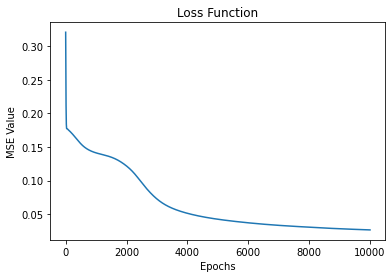

In [107]:
## main
def main():
    features,label = hr_preprocessing()
    hr_modeling(features, label)
    
if __name__ == "__main__":
    main()
    


In [9]:
import sys
sys.executable

'c:\\programdata\\miniconda3\\python.exe'

## 回归：回归树与提升树
- GBDT(Gradient Boosting Decision Tree)

<img style="float: center;" src=".\figures\GBDT.png" width=50%>
<center>Fig. GBDT</center>

<img style="float: center;" src=".\figures\GBDT2.png" width=50%>
<center>Fig. GBDT</center>

<img style="float: center;" src=".\figures\GBDT3.png" width=50%>
<center>Fig. GBDT</center>



In [80]:
# %load ".\\code\\load_hr_modeling.py"
## 建模分析
def hr_modeling(features, label):
    from sklearn.model_selection import train_test_split
    f_v = features.values # 特征值
    f_names = features.columns.values # 特征名
    l_v = label.values # 标注
    # 测试集：X_tt, Y_tt
    # 验证集：X_validation, Y_validation
    X_tt,X_validation,Y_tt,Y_validation = train_test_split(f_v, l_v, test_size=0.2)
    X_train,X_test,Y_train,Y_test = train_test_split(X_tt, Y_tt, test_size=0.25)
    print(len(X_train), len(X_validation), len(X_test))
    
    ## 模型构建
    from sklearn.metrics import accuracy_score,recall_score,f1_score # 模型评价
    from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier # KNN
    from sklearn.naive_bayes import GaussianNB,BernoulliNB # 高斯朴素贝叶斯、伯努利朴素贝叶斯
    from sklearn.tree import DecisionTreeClassifier # 决策树
    from sklearn.svm import SVC # 支持向量机
    from sklearn.ensemble import RandomForestClassifier # 随机森林
    from sklearn.ensemble import AdaBoostClassifier # AdaBoost
    from sklearn.linear_model import LogisticRegression # Logistic 回归
    from sklearn.ensemble import GradientBoostingClassifier # GDBT 回归树
#     from keras.models import Sequential # 序贯模型
#     from keras.layers.core import Dense,Activation # 稠密层、激活函数
#     from keras.optimizers import SGD # 随机梯度下降
#     mdl = Sequential()
#     mdl.add(Dense(50, input_dim=len(f_v[0]))) # 输入层：指定隐含层神经元个数为 50
#     mdl.add(Activation("sigmoid")) # 激活函数
#     mdl.add(Dense(2)) # 输出层
#     mdl.add(Activation("softmax")) # 归一化
#     sgd = SGD(lr=0.05) # 学习率
#     mdl.complie(loss="mean_squared_error", optimizer="adam") # 编译: 损失函数-均方误差、优化器-亚当优化器
#     mdl.fit(X_train, np.array([[0,1] if i == 1 else [1,0] for i in Y_train]), nb_epoch=10000, batch_size=8999)
#     xy_lst = [(X_train,Y_train), (X_validation,Y_validation), (X_test,Y_test)]
#     set_name = ["Train:", "Validation:", "Test:"]
#     for i in range(len(xy_lst)):
#         X_part = xy_lst[i][0]
#         Y_part = xy_lst[i][1]
#         Y_pred = mdl.predict_classes(X_part)
#         print(i, set_name[i])
#         print("NN", "- ACC:", accuracy_score(Y_part, Y_pred))
#         print("NN", "- REC:", recall_score(Y_part, Y_pred))
#         print("NN", "- F1:", f1_score(Y_part, Y_pred))
#     return 
    
    models = [] # 初始化存放模型的列表
    
#     models.append(("KNN", KNeighborsClassifier(n_neighbors=3))) # KNN
#     models.append(("GaussianNB", GaussianNB())) # Gaussian Naive Bayes
#     models.append(("BernoulliNB", BernoulliNB())) # BernoulliNB Naive Bayes
#     models.append(("DecisionTreeGini", DecisionTreeClassifier())) # 决策树：Gini 系数
#     models.append(("DecisionTreeEntropy", DecisionTreeClassifier(criterion="entropy"))) # 决策树：信息熵
#     models.append(("SVM Classifier", SVC(C=1000))) # 支持向量机：C 值越大模型越准确，计算时间越长
    models.append(("OriginalRandomForest", RandomForestClassifier())) # 随机森林
#     models.append(("RandomForest", RandomForestClassifier(n_estimators=11, max_features=None))) # 随机森林
#     models.append(("AdaBoost", AdaBoostClassifier())) # AdaBoost
    models.append(("LogisticRegression", LogisticRegression(max_iter=10000))) # Logistic 回归
    models.append(("GDBT", GradientBoostingClassifier(max_depth=6, n_estimators=100))) # GDBT 回归树
    for clf_name,clf in models:
        print("++++", clf_name, "++++")
        clf.fit(X_train, Y_train)
        xy_lst = [(X_train,Y_train), (X_validation,Y_validation), (X_test,Y_test)]
        set_name = ["Train:", "Validation:", "Test:"]
        for i in range(len(xy_lst)):
            X_part = xy_lst[i][0]
            Y_part = xy_lst[i][1]
            Y_pred = clf.predict(X_part)
#             print(i)
            print(i, set_name[i])
            print(clf_name, "- ACC:", accuracy_score(Y_part, Y_pred))
            print(clf_name, "- REC:", recall_score(Y_part, Y_pred))
            print(clf_name, "- F1:", f1_score(Y_part, Y_pred))



In [81]:
## main
def main():
    features,label = hr_preprocessing()
    hr_modeling(features, label)
    
if __name__ == "__main__":
    main()
    


8999 3000 3000
++++ OriginalRandomForest ++++
0 Train:
OriginalRandomForest - ACC: 1.0
OriginalRandomForest - REC: 1.0
OriginalRandomForest - F1: 1.0
1 Validation:
OriginalRandomForest - ACC: 0.9896666666666667
OriginalRandomForest - REC: 0.9620786516853933
OriginalRandomForest - F1: 0.9778729478943612
2 Test:
OriginalRandomForest - ACC: 0.99
OriginalRandomForest - REC: 0.9581529581529582
OriginalRandomForest - F1: 0.9779086892488955
++++ LogisticRegression ++++
0 Train:
LogisticRegression - ACC: 0.7883098122013557
LogisticRegression - REC: 0.34164358264081257
LogisticRegression - F1: 0.43722304283604135
1 Validation:
LogisticRegression - ACC: 0.7856666666666666
LogisticRegression - REC: 0.31320224719101125
LogisticRegression - F1: 0.40955004591368227
2 Test:
LogisticRegression - ACC: 0.7863333333333333
LogisticRegression - REC: 0.30735930735930733
LogisticRegression - F1: 0.39925023430178064
++++ GDBT ++++
0 Train:
GDBT - ACC: 0.994332703633737
GDBT - REC: 0.9801477377654663
GDBT - F1

## 聚类
> 分类和回归都属于有监督学习，都有标注，为分类或回归任务提供指引  
> 聚类和关联规则属于无监督学习，旨在为数据打标注  

- 聚类：将集合分成由类似的对象组成的多个类的过程


### K-means
> 基于切割

- 所有类都有一个中心，属于一个类的点到它的中心的距离相比于其他类的中心更近

<img style="float: center;" src=".\figures\K-means.png" width=25%>
<center>Fig. K-means</center>

- 算法流程：
    1. 从 n 个样本中随机选取 k 个作为初始质心
    2. 对每个样本测量其到每个质心的距离，并把它归到最近的质心的类
    3. 重新计算得到的各个类的质心
    4. 迭代 2~3 步直至新的质心与前一个质心相等或小于指定的阈值，算法结束
- 缺点：
    - 初始质心位置会影响最终聚类效果
        - 方法：多尝试几次，取最稳定结果
    - 个别离群值会影响整体聚类效果
        - 将取质心换成取中点（K-Medoids）
    - 必须指定 K（聚类个数）
        - 其他衡量因子辅助（如轮廓系数）


In [1]:
## 导包
import numpy as np # 数值计算
import matplotlib.pyplot as plt # 绘图

In [2]:
from sklearn.datasets import make_circles,make_blobs,make_moons # 引用数据集
from sklearn.cluster import KMeans # K-means

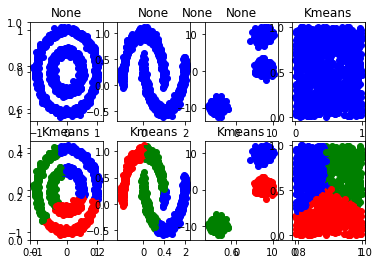

In [89]:
n_samples = 1000 # 样本数
circles = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
moons = make_moons(n_samples=n_samples, noise=0.05)
blobs = make_blobs(n_samples=n_samples, random_state=8)
random_data = np.random.rand(n_samples, 2), None
colors = "bgrcmyk" # 绘图色系
data = [circles,moons,blobs,random_data]
models = [("None", None), ("Kmeans", KMeans(n_clusters=3))]
f = plt.figure()
for inx,clt in enumerate(models):
    clt_name,clt_entity = clt
    for i,dataset in enumerate(data):
        X,Y = dataset
        if not clt_entity:
            clt_res = [0 for item in range(len(X))]
        else:
            clt_entity.fit(X)
            clt_res = clt_entity.labels_.astype(np.int)
        plt.title(clt_name)
        f.add_subplot(len(models), len(data), inx*len(data)+i+1)
        [plt.scatter(X[p,0], X[p,1], color=colors[clt_res[p]]) for p in range(len(X))]
plt.show()

### DBSCAN
> 基于密度  

- DBSCAN(Density-Based Spatial Clustering of Applications with Noise)：找到密度相连对象的最大集合
- E 领域：给定对象半径为 E 内的区域称为该对象的 E 领域
- 核心对象：如果给定对象 E 领域内的样本点数大于等于 MinPts，则称该对象为核心对象
- 直接密度可达：对于样本集合 D，如果样本点 q 在 p 的 E 领域内，并且 p 为核心对象，那么对象 q 从对象 p 直接密度可达
- 密度可达：对于样本集合 D，给定一串样本点 p1,p2,...,pn，p=p1, q= pn, 假如对象 pi 从pi-1 直接密度可达，那么对象 q 从对象 p 密度可达
- 密度相连：存在样本集合 D 中的一点 o，如果对象 o 到对象 p 和对象 q 都是密度可达的，那么 p 和 q 密度相连

<img style="float: center;" src=".\figures\DBSCAN.png" width=50%>
<center>Fig. DBSCAN</center>



- Tips:
    - 优点：离群点较不敏感
    - 计算一个点的相邻点较复杂：需要 KD-Tree 等数据几个辅助
    

In [3]:
from sklearn.cluster import KMeans,DBSCAN # K-means、DBSCAN

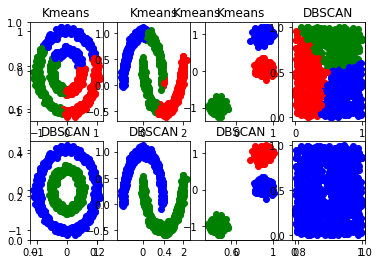

In [99]:
n_samples = 1000 # 样本数
circles = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
moons = make_moons(n_samples=n_samples, noise=0.05)
blobs = make_blobs(n_samples=n_samples, random_state=8, center_box=(-1,1), cluster_std=0.1)
random_data = np.random.rand(n_samples, 2), None
colors = "bgrcmyk" # 绘图色系
data = [circles,moons,blobs,random_data]
models = [("Kmeans", KMeans(n_clusters=3)), ("DBSCAN", DBSCAN(min_samples=3, eps=0.2))]
# models = [("DBSCAN", DBSCAN(min_sampls=3, eps=0.5))]
f = plt.figure()
for inx,clt in enumerate(models):
    clt_name,clt_entity = clt
    for i,dataset in enumerate(data):
        X,Y = dataset
        if not clt_entity:
            clt_res = [0 for item in range(len(X))]
        else:
            clt_entity.fit(X)
            clt_res = clt_entity.labels_.astype(np.int)
        plt.title(clt_name)
        f.add_subplot(len(models), len(data), inx*len(data)+i+1)
        [plt.scatter(X[p,0], X[p,1], color=colors[clt_res[p]]) for p in range(len(X))]
plt.show()

### 层次聚类

- 层次聚类：

<img style="float: center;" src=".\figures\层次聚类.png" width=50%>
<center>Fig. 层次聚类</center>

- 距离衡量：
    - 最短距离
    - 最长距离
    - 平均距离
    - Ward：$$ESS = \sum^n_{i=1}x^2_i-\frac{1}{n}(\sum^n_{i=1}x_i)^2$$
- Tips:
    - 优点：聚类灵活
    - 缺点：计算复杂度比较高，离群点影响比较大


In [4]:
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering # K-means、DBSCAN、层次聚类

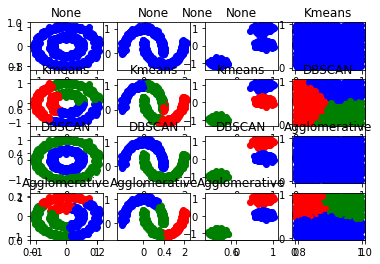

In [5]:
n_samples = 1000 # 样本数
circles = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
moons = make_moons(n_samples=n_samples, noise=0.05)
blobs = make_blobs(n_samples=n_samples, random_state=8, center_box=(-1,1), cluster_std=0.1)
random_data = np.random.rand(n_samples, 2), None
colors = "bgrcmyk" # 绘图色系
data = [circles,moons,blobs,random_data]
models = [("None", None), 
          ("Kmeans", KMeans(n_clusters=3)), 
          ("DBSCAN", DBSCAN(min_samples=3, eps=0.2)), 
          ("Agglomerative", AgglomerativeClustering(n_clusters=3, linkage="ward"))]
f = plt.figure()
for inx,clt in enumerate(models):
    clt_name,clt_entity = clt
    for i,dataset in enumerate(data):
        X,Y = dataset
        if not clt_entity:
            clt_res = [0 for item in range(len(X))]
        else:
            clt_entity.fit(X)
            clt_res = clt_entity.labels_.astype(np.int)
        plt.title(clt_name)
        f.add_subplot(len(models), len(data), inx*len(data)+i+1)
        [plt.scatter(X[p,0], X[p,1], color=colors[clt_res[p]]) for p in range(len(X))]
plt.show()

### 图分裂（Split）
> 基于图

- 承受系数：$$t = \frac{min(W_1,W_2)}{n}$$
- 分裂阈值：$$\lambda = \frac{1}{2}e^{\frac{x}{y}}$$
    - 其中，x：边数、y：点数
    
    <img style="float: center;" src=".\figures\图分裂.png" width=50%>
    <center>Fig. 图分裂</center>


## 关联规则
> 反映一个事物与其他事物之间的相互依存性和关联性  

- **项目**：一个字段，对交易来说一般是指一次交易中的一个物品
- **事务**：某个客户在一次交易中，发生的所有项目的集合（**全集**）
- **项集**：包含若干个项目的集合（一次事务中的），是事务的**子集**
- **频繁项集**：某个项集的支持度大于设定阈值（认为设定或依据数据分布和经验来设定），即称这个项集为频繁项集
- **支持度（Support）**：项集 $\{ X,Y \}$ 在总项集中出现的概率
- **置信度（Condfidence）**：在先决条件 $X$ 发生的条件下，由关联规则 $\{ X\rightarrow Y \}$ 推出 $Y$ 的概率
- **提升度**：表示含有 $X$ 的条件下同时含有 $Y$ 的概率，与无论是否含 $X$ 只要含 $Y$ 的概率之比$$\frac{Confidence(\{X\}\rightarrow\{Y\}}{Support(\{Y\})})$$


- 例子：

<img style="float: center;" src=".\figures\啤酒尿布.png" width=70%>
<center>Fig. 啤酒-尿布</center>

<img style="float: center;" src=".\figures\牛奶咖啡.png" width=70%>
<center>Fig. 牛奶-咖啡</center>


- Apriori

<img style="float: center;" src=".\figures\Apriori.png" width=50%>
<center>Fig. Apriori</center>



- Apriori 算法框架

<img style="float: center;" src=".\figures\Apriori算法框架.png" width=70%>
<center>Fig. Apriori 算法框架</center>


In [32]:
## 定义类：关联规则
class AssctAnaclass():
    def fit(self, data):
        self.apr_blk = AprBlk(data)
        return self
    def get_freq(self, thd=1, hd=1):
        return self.apr_blk.getFreqItems(thd=thd, hd=hd)
    def get_conf_high(self, thd, h_thd=10):
        return self.apr_blk.getConf(low=False, h_thd=h_thd, l_thd=thd)
    def get_conf__low(self, thd, hd, l_thd=1):
        return self.apr_blk.getConf(h_thd=thd, l_thd=l_thd, hd=hd)
    

In [33]:
## Apriori Block
class AprBlk():
    def __init__(self, data):
        cnt = 0
        self.apr_layers = dict()
        self.data_num = len(data)
        for datum in data:
            cnt += 1
            datum = comb(datum)
            nodes = [AprNode(da) for da in datum]
            for node in nodes:
                if not node.size in self.apr_layers:
                    self.apr_layers[node.size] = AprLayer()
                if not node in self.apr_layers[node.size].d:
                    self.apr_layers[node.size].d[node] = node
                self.apr_layers[node.size].d[node].incNum()
            for node in nodes:
                if node.size == 1:
                    continue
                for sn in node.s:
                    sub_n = AprNode(node.s-set([sn]))
                    self.apr_layers[node.size-1].d[sub_n].addLnk(node)
                    
    def getFreqItems(self, thd=1, hd=1):
        freq_items = []
        for layer in self.apr_layers:
            for node in self.apr_layers[layer].d:
                if self.apr_layers[layer].d[node].num < thd:
                    continue
                freq_items.append((self.apr_layers[layer].d[node].s, self.apr_layers[layer].d[node].num))
        freq_items.sort(key=lambda x: x[1], reverse=True)
        return freq_items[:hd]
    
    def getConf(self, low=True, h_thd=10, l_thd=1, hd=1):
        confidence = []
        for layer in self.apr_layers:
            for node in self.apr_layers[layer].d:
                if self.apr_layers[layer].d[node].num < h_thd:
                    continue
                for lnk_node in node.lnk_nodes:
                    if lnk_node.num < l_thd:
                        continue
                    conf = float(lnk_node.num)/float(node.num)
                    confidence.append([node.s, node.num, lnk_node.s, lnk_node.num, conf])
        confidence.sort(key=lambda x: x[4])
        if low:
            return confidence[:hd]
        else:
            return confidence[-hd::-1]
                        

In [34]:
## 
from itertools import combinations
def comb(lst):
    ret =[]
    for i in range(1, len(lst)+1):
        ret += list(combinations(lst, i))
    return ret


In [35]:
## 
class AprLayer(object):
    d = dict()
    def __init__(self):
        self.d = dict()

In [36]:
## 
class AprNode(object):
    def __init__(self, node):
        self.s = set(node)
        self.size = len(self.s)
        self.lnk_nodes = dict()
        self.num = 0
    def __hash__(self):
        return hash("__".join(sorted([str(item) for item in list(self.s)])))
    def __eq__(self, other):
        if "__".join(sorted([str(item) for item in list(self.s)])) == "__".join(sorted([str(item) for item in list(other.s)])):
            return True
        return False
    def isSubnode(self, node):
        return self.s.isSubnode(node.s)
    def incNum(self, num=1):
        self.num += num
    def addLnk(self, node):
        self.lnk_nodes[node] = node.s
    

In [37]:
## main 函数
def main():
    data = [["牛奶","啤酒","尿布"],
            ["牛奶","咖啡","啤酒","尿布"],
            ["香肠","牛奶","饼干"],
            ["尿布","果汁","啤酒"],
            ["钉子","啤酒"],
            ["尿布","毛巾","香肠"],
            ["啤酒","毛巾","尿布","饼干"]]
    print("Freq", AssctAnaclass().fit(data).get_freq(thd=3, hd=10))
    print("Conf", AssctAnaclass().fit(data).get_conf_high(thd=3, h_thd=3))
    
if __name__ == "__main__":
    main()
    

Freq [({'啤酒'}, 5), ({'尿布'}, 5), ({'尿布', '啤酒'}, 4), ({'牛奶'}, 3)]
Conf [[{'尿布'}, 5, {'尿布', '啤酒'}, 4, 0.8], [{'啤酒'}, 5, {'尿布', '啤酒'}, 4, 0.8]]


## 序列规则
> 序列规则将时间因素考虑进来，剔除关联规则中时间点靠后的项对时间点靠前的项的支持  

- Apriori-All
    - Forward: Apriori
    - Backward: 去掉时间序列之后的项对之前的项的支持


## 半监督学习
> 样本集部分有标注，部分无标注（常远大于有标注样本）  

- 获取标注的成本较大
- 无标注样本可能很容易获得
- 算法思想：
    - 生成模型
    - 判别模型（物以类聚）
        - 标签传播算法
        
        <img style="float: center;" src=".\figures\标签传播算法.png" width=25%>
        <center>Fig. 标签传播算法</center>



- Iris 数据集：
| field | 
| :--- |
| 花萼长度 | 
| 花萼宽度 | 
| 花瓣长度 | 
| 花瓣宽度 | 
| 种类：山鸢尾（Iris Setosa）、杂色鸢尾（Iris Versicolour）、维吉尼亚鸢尾（Iris Virginica）


In [82]:
## 导包
import numpy as np # 数值计算

In [83]:
from sklearn import datasets # 数据集包
iris = datasets.load_iris() # 导入鸢尾花数据集
labels = np.copy(iris.target) # 复制标签
print("Data Size:", len(labels))
# 随机生成未标注数据（标签为 -1）
random_unlabeled_points = np.random.rand(len(iris.target))
random_unlabeled_points = random_unlabeled_points < 0.3
Y = labels[random_unlabeled_points]
labels[random_unlabeled_points] = -1
print("Unlabeled Number:", list(labels).count(-1))

Data Size: 150
Unlabeled Number: 44


In [84]:
print(iris.target)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0 -1  0 -1  0
  0  0 -1  0  0  0 -1  0  0 -1 -1  0  0  0 -1  0  0 -1  0 -1 -1 -1  0  0
  0  0 -1  1 -1  1  1  1 -1 -1  1  1  1  1 -1 -1 -1  1  1  1 -1  1 -1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1  2 -1  2 -1  2  2  2  2  2  2  2  2 -1  2  2  2  2 -1  2  2
 -1 -1 -1  2 -1  2  2 -1  2  2  2 -1  2  2 -1  2  2 -1  2  2  2 -1  2  2
  2  2  2  2  2  2]


In [85]:
from sklearn.semi_supervised import LabelPropagation # 标签传播算法
label_prop_model = LabelPropagation() # 模型：标签传播算法
label_prop_model.fit(iris.data, labels) # 拟合
Y_pred = label_prop_model.predict(iris.data) # 预测
Y_pred = Y_pred[random_unlabeled_points]

In [86]:
## 模型评价
from sklearn.metrics import accuracy_score,recall_score,f1_score # 准确率、召回率、F 值
print("ACC:", accuracy_score(Y, Y_pred))
print("REC:", recall_score(Y, Y_pred, average="micro"))
print("F-Score:", f1_score(Y, Y_pred, average="micro"))

ACC: 0.9772727272727273
REC: 0.9772727272727273
F-Score: 0.9772727272727273


## 小结
- 分类：KNN、朴素贝叶斯、决策树、SVM、逻辑映射、GBDT、集成方法、神经网络
- 回归：线性回归、逻辑回归、神经网络、回归树与提升树
- 聚类：K-means、DBSCAN、AgglomerativeCluster、Split
- 关联：关联规则、序列规则
- 半监督：标签传播
- [如何选择模型](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html): 
![模型选择](.\\figures\\ml_map.png)
<center>Fig. 如何选择模型</center>
